# <font color="blue">ADA - Data Journey</font>
# <font color="blue">Técnicas de Programação 1</font>
## <font color="lightblue">Projeto Final do Módulo II</font>
## <font color="lightblue">Avaliação das Estatisticas do Campeonato Brasileiro</font>

**Professor: Thiago Medeiros e Lúcio Monteiro**<br>

**Trabalho realizado por:**<br>

**Ana Carolina Gavioli Guerra Do Nascimento**<br>
**Derik Gouvea Galante**<br>
**Olga Georgios Alexopoulos**<br>
**Victor Augusto Roudino**<br>
**Victor Cavalaro**<br>

``Importação PANDAS e Numpy``

In [1]:
import pandas as pd

import numpy as np

``Para análise gráfica, instalação e importações``

In [2]:
!pip install seaborn

In [3]:
!pip install matplotlib

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

## Início manipulação dados do data set Estatisticas Full

``Verificar o conteúdo do data set``

In [5]:
#abrindo o data set

df_origin = pd.read_csv('campeonato-brasileiro-full.csv')

In [6]:
#identificando os itens das colunas para propor as perguntas a serem respondidas

df_origin.head()


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


``Verificando se há valores nulos``

``Verificando quantos valores nulos temos``

In [7]:
df_origin.isna().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [8]:
percentil = df_origin.isna().sum()/len(df_origin)*100

print(f'O tamanho do set de dados é de: {len(df_origin)} dados')
print(f'A tabela a seguir, indica o percentil de cada dado nulo: \n \n {percentil}')

O tamanho do set de dados é de: 8025 dados
A tabela a seguir, indica o percentil de cada dado nulo: 
 
 ID                     0.000000
rodata                 0.000000
data                   0.000000
hora                   0.000000
mandante               0.000000
visitante              0.000000
formacao_mandante     61.981308
formacao_visitante    61.981308
tecnico_mandante      57.445483
tecnico_visitante     57.445483
vencedor               0.000000
arena                  0.000000
mandante_Placar        0.000000
visitante_Placar       0.000000
mandante_Estado        0.000000
visitante_Estado       0.000000
dtype: float64


``Por ter +/- 50% dos valores nulos nas colunas formação mandante, visitante, técnico mandante e visitante, seus valores são estatísticamente não significantes.``

``Desta forma, foram removidos.``

In [9]:
df_full_nnull = df_origin.drop(['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante'], axis=1)

In [10]:
df_full_nnull.head()

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP


``Para responder a pergunta 1, será necessário saber que há empates sendo simbolizados por - e devem ser removidos``

1 - Qual time ganhou mais vezes?

In [11]:
vencedor_max = df_full_nnull['vencedor'].value_counts().index[1]


df_time = df_full_nnull['vencedor'].replace('-', np.nan, regex=True).dropna().value_counts().head(5)
   

print(f'O time que ganhou mais vezes foi o {vencedor_max}. \n \n A tabela a seguir, mostra os 5 primeiros times com mais vitórias: \n {df_time}' )

O time que ganhou mais vezes foi o Sao Paulo. 
 
 A tabela a seguir, mostra os 5 primeiros times com mais vitórias: 
 Sao Paulo        351
Flamengo         335
Santos           329
Internacional    324
Corinthians      314
Name: vencedor, dtype: int64


2 - Qual time fez mais gols?


In [12]:
df_full_nnull

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,Cuiaba,Arena Pantanal,2,1,MT,PR
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,Fluminense,Nabizão,0,1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,Atletico-MG,Neo Química Arena,0,1,SP,MG
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP


``Para saber qual time fez mais gol como mandante``

In [13]:
#alteracao do indice para mandante
df_new_index_mandante = df_full_nnull.set_index('mandante').drop(['ID', 'rodata'], axis=1)

#realizando a sumarização dos dados, solicitando o total de gols por mandante
df_ordenar_mandate = df_new_index_mandante.groupby('mandante').sum().sort_values(by='mandante_Placar', ascending=False)

#retornar o DF , splitando a primeira linha que trata sobre os empates caso apareça
df_ordenar_mandate


,mandante_Placar,visitante_Placar
mandante,,
Santos,702,361
Sao Paulo,656,339
Flamengo,652,365
Atletico-MG,649,392
Athletico-PR,611,338
Palmeiras,606,356
Gremio,606,314
Internacional,605,314
Fluminense,594,400


``Criando um DF para aplicação gráfica futura``

In [14]:
#Criando um novo DF que futuramente será utilizado no gráfico

df_gols_mandante = df_full_nnull[['mandante','mandante_Placar' ]]

df_gols_mandante

,mandante,mandante_Placar
0,Guarani,4
1,Athletico-PR,2
2,Flamengo,1
3,Goias,2
4,Internacional,1
...,...,...
8020,Cuiaba,2
8021,Bragantino,0
8022,Corinthians,0
8023,Internacional,3


``Preparação e visualização gráfica dos 5 maiores goleadores como mandante``

In [15]:
#realizando a sumarização dos dados, solicitando o total de gols por mandante
df_ordenar_mandante= df_new_index_mandante.groupby('mandante').sum().sort_values(by='mandante_Placar', ascending=False)

#retornar o DF , splitando a primeira linha que trata sobre os empates caso apareça
df_split = df_ordenar_mandante[:5]

C:\Users\ana.guerra\AppData\Local\Temp\ipykernel_3408\4254176188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['mandante'] = df_split.index


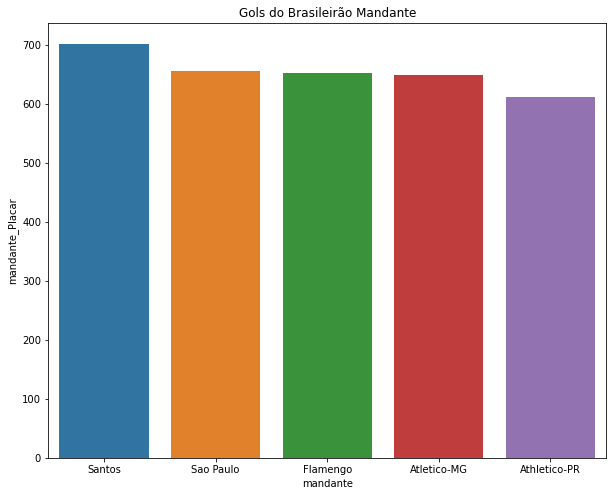

In [16]:
# Define o tamanho da figura
plt.figure(figsize=(10, 8))

# Cria o gráfico de barras com seaborn
df_split['mandante'] = df_split.index
sns.barplot(x='mandante', y='mandante_Placar', data=df_split)


# Define o título do gráfico
plt.title('Gols do Brasileirão Mandante')

# Mostra o gráfico
plt.show()

``Para saber qual time fez mais gol como visitante``

In [17]:
#alteracao do indice para mandante
df_new_index_visitante = df_full_nnull.set_index('visitante').drop(['ID', 'rodata'], axis=1)

#realizando a sumarização dos dados, solicitando o total de gols por mandante
df_ordenar_visitante = df_new_index_visitante.groupby('visitante').sum().sort_values(by='visitante_Placar', ascending=False)

#retornar o DF , splitando a primeira linha que trata sobre os empates caso apareça
df_ordenar_visitante


,mandante_Placar,visitante_Placar
visitante,,
Sao Paulo,502,467
Flamengo,555,461
Fluminense,585,453
Santos,557,437
Atletico-MG,554,430
Palmeiras,451,407
Corinthians,452,392
Internacional,493,390
Cruzeiro,462,388


``Criando um DF para aplicação gráfica futura``

In [18]:
#Criando um novo DF que futuramente será utilizado no gráfico

df_gols_visitante = df_full_nnull[['visitante','visitante_Placar' ]]

df_gols_visitante


,visitante,visitante_Placar
0,Vasco,2
1,Gremio,0
2,Coritiba,1
3,Paysandu,2
4,Ponte Preta,1
...,...,...
8020,Coritiba,1
8021,Fluminense,1
8022,Atletico-MG,1
8023,Palmeiras,0


``Preparação visualização gráfica dos 5 maiores goleadores como visitante``

In [19]:
#realizando a sumarização dos dados, solicitando o total de gols por mandante
df_ordenar_visitante= df_new_index_visitante.groupby('visitante').sum().sort_values(by='visitante_Placar', ascending=False)

#retornar o DF , splitando a primeira linha que trata sobre os empates caso apareça
df_split_visitante = df_ordenar_visitante[:5]

C:\Users\ana.guerra\AppData\Local\Temp\ipykernel_3408\2061427138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split_visitante['visitante'] = df_split.index


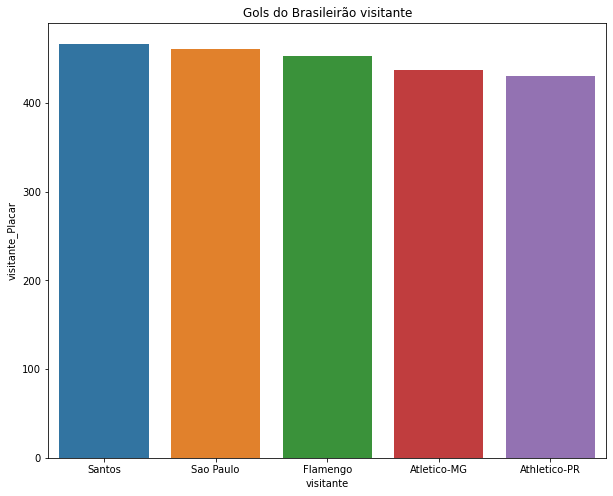

In [20]:
# Define o tamanho da figura
plt.figure(figsize=(10, 8))

# Cria o gráfico de barras com seaborn
df_split_visitante['visitante'] = df_split.index
sns.barplot(x='visitante', y='visitante_Placar', data=df_split_visitante)

# Define o título do gráfico
plt.title('Gols do Brasileirão visitante')

# Mostra o gráfico
plt.show()

``Análise Gráfica``

``Alterando o indíce para Mandante``

In [21]:
new_df_index_mandante = df_full_nnull.set_index('mandante')

new_df_index_mandante.head()

,ID,rodata,data,hora,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
mandante,,,,,,,,,,,
Guarani,1,1,29/3/2003,16:00,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
Athletico-PR,2,1,29/3/2003,16:00,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
Flamengo,3,1,30/3/2003,16:00,Coritiba,-,Maracanã,1,1,RJ,PR
Goias,4,1,30/3/2003,16:00,Paysandu,-,Serra Dourada,2,2,GO,PA
Internacional,5,1,30/3/2003,16:00,Ponte Preta,-,Beira Rio,1,1,RS,SP


3 - Qual foi o time que fez mais goleada?


``Goleada como mandante``

In [22]:
# Seleciona apenas as colunas que serão utilizadas
df_full_nnull_goleada = df_origin[['mandante', 'visitante', 'mandante_Placar', 'visitante_Placar', 'vencedor']]

# Adiciona coluna com a diferença entre os placares
df_full_nnull_goleada['dif_placar'] = df_full_nnull_goleada.apply(lambda row: row['mandante_Placar'] - row['visitante_Placar'], axis=1)

df_full_nnull_goleada


C:\Users\ana.guerra\AppData\Local\Temp\ipykernel_3408\79711086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_nnull_goleada['dif_placar'] = df_full_nnull_goleada.apply(lambda row: row['mandante_Placar'] - row['visitante_Placar'], axis=1)


,mandante,visitante,mandante_Placar,visitante_Placar,vencedor,dif_placar
0,Guarani,Vasco,4,2,Guarani,2
1,Athletico-PR,Gremio,2,0,Athletico-PR,2
2,Flamengo,Coritiba,1,1,-,0
3,Goias,Paysandu,2,2,-,0
4,Internacional,Ponte Preta,1,1,-,0
...,...,...,...,...,...,...
8020,Cuiaba,Coritiba,2,1,Cuiaba,1
8021,Bragantino,Fluminense,0,1,Fluminense,-1
8022,Corinthians,Atletico-MG,0,1,Atletico-MG,-1
8023,Internacional,Palmeiras,3,0,Internacional,3


In [23]:
# Seleciona apenas as linhas onde a diferença entre os placares é maior ou igual a 3
df_dif_placar = df_full_nnull_goleada[df_full_nnull_goleada['dif_placar'] >= 3]

# Encontra o valor mais frequente na coluna 'vencedor' das linhas onde a diferença entre os placares é maior ou igual a 3
vencedor_freq = df_dif_placar['vencedor'].mode()

# Retorna o resultado
if len(vencedor_freq) > 1:
    print(f"Há mais de um valor com a maior frequência na coluna 'vencedor' relacionado a uma diferença de placar de 3 ou mais.")
else:
    print(f"A quantidade de vezes que o valor '{vencedor_freq[0]}' aparece na coluna 'vencedor' relacionado a uma diferença de placar de 3 ou mais é: {df_dif_placar['vencedor'].value_counts()[vencedor_freq[0]]}")

Há mais de um valor com a maior frequência na coluna 'vencedor' relacionado a uma diferença de placar de 3 ou mais.


In [24]:
df_sumarizada_goleada = df_full_nnull_goleada.groupby('vencedor').sum().sort_values('dif_placar', ascending=False)

df_sumarizada_goleada

,mandante_Placar,visitante_Placar,dif_placar
vencedor,,,
Santos,625,352,273
Athletico-PR,538,291,247
Atletico-MG,576,342,234
Gremio,506,286,220
Internacional,537,321,216
Flamengo,572,358,214
Sao Paulo,601,395,206
Palmeiras,547,362,185
Corinthians,502,320,182


``Análise gráfica dos 5 maiores goleadores``

C:\Users\ana.guerra\AppData\Local\Temp\ipykernel_3408\3158516577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sumarizada_goleada_split['vencedor'] = df_sumarizada_goleada_split.index


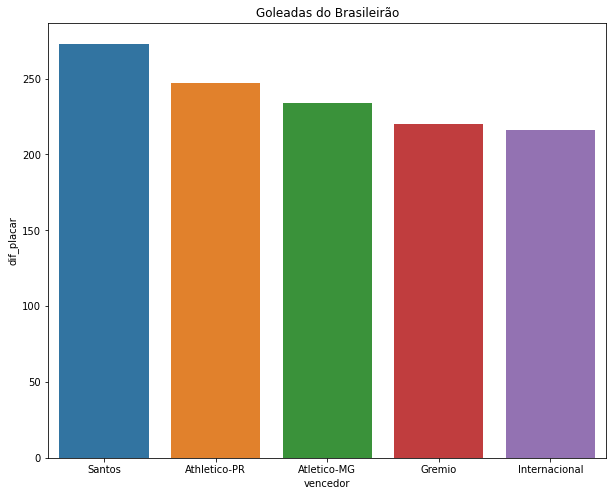

In [25]:
df_sumarizada_goleada_split = df_sumarizada_goleada[:5]

# Define o tamanho da figura
plt.figure(figsize=(10, 8))

# Cria o gráfico de barras com seaborn
df_sumarizada_goleada_split['vencedor'] = df_sumarizada_goleada_split.index
sns.barplot(x='vencedor', y='dif_placar', data=df_sumarizada_goleada_split)

# Define o título do gráfico
plt.title('Goleadas do Brasileirão')

# Mostra o gráfico
plt.show()

``4 - Quem ganhou invicto?``

In [64]:
df_full_nnull['data'] = pd.to_datetime(df_full_nnull['data'], infer_datetime_format=True)

df_mandantes_sem_derrotas = df_full_nnull[df_full_nnull['mandante_Placar'] >= df_full_nnull['visitante_Placar']]
df_mandantes_sem_derrotas = df_mandantes_sem_derrotas.rename(columns  = {"mandante" : "time"})

df_visitantes_sem_derrotas = df_full_nnull[df_full_nnull['mandante_Placar'] <= df_full_nnull['visitante_Placar']]
df_visitantes_sem_derrotas = df_visitantes_sem_derrotas.rename(columns  = {"visitante" : "time"})

df_sem_derrotas = pd.concat([df_mandantes_sem_derrotas, df_visitantes_sem_derrotas])
df_sem_derrotas[(df_sem_derrotas['time'] == 'Bragantino') & (df_sem_derrotas['data'].dt.year == 2021)]
df_invictos = df_sem_derrotas.groupby([df_sem_derrotas['data'].dt.year, df_sem_derrotas['time']])['ID'].count()
df_invictos = df_invictos[df_invictos == 38]
df_invictos 

#print(f'Os times invictos foram {df_invictos.index[0][1]}')


data  time      
2003  Cruzeiro      38
2021  Bragantino    38
Name: ID, dtype: int64

``5 - Qual time ganhou mais vezes como mandante e mais vezes como visitante?``

In [ ]:
df_full_nnull.head()

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP


In [ ]:
# Para verificarmos o time que mais vezes ganhou os jogos como mandante:
df_venc_mandante = pd.DataFrame(df_full_nnull['vencedor'].loc[df_full_nnull['vencedor']==df_full_nnull['mandante']].value_counts(0))

print(f'O time que ganhou mais vezes como mandante dos jogos foi o {df_venc_mandante.index[0]}, com um total de {df_venc_mandante.vencedor[0]} vezes.')

O time que ganhou mais vezes como mandante dos jogos foi o Santos, com um total de 224 vezes.


In [ ]:

# Para verificarmos o time que mais vezes ganhou os jogos como visitante:
df_venc_visitante = pd.DataFrame(df_full_nnull['vencedor'].loc[df_full_nnull['vencedor']==df_full_nnull['visitante']].value_counts(0))

print(f'O time que ganhou mais vezes como visitante dos jogos foi o {df_venc_visitante.index[0]}, com um total de {df_venc_visitante.vencedor[0]} vezes.')

O time que ganhou mais vezes como visitante dos jogos foi o Sao Paulo, com um total de 130 vezes.


``6 - De qual estado é o time que mais ganhou como mandante e como visitante?``

In [ ]:
# Para verificarmos o Estado do time que mais vezes ganhou os jogos como mandante:
df_venc_mandante_1 = df_full_nnull[df_full_nnull['vencedor']==df_full_nnull['mandante']]
df_venc_mandante_1

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
5,6,1,30/3/2003,16:00,Criciuma,Fluminense,Criciuma,Heriberto Hulse,2,0,SC,RJ
15,16,2,5/4/2003,18:00,Gremio,Guarani,Gremio,Olímpico,3,1,RS,SP
19,20,2,6/4/2003,16:00,Ponte Preta,Juventude,Ponte Preta,Moisés Lucarelli,1,0,SP,RS
...,...,...,...,...,...,...,...,...,...,...,...,...
8014,8015,37,10/11/2022,20:00,Atletico-MG,Cuiaba,Atletico-MG,Mineirão,3,0,MG,MT
8016,8017,38,13/11/2022,16:03,Athletico-PR,Botafogo-RJ,Athletico-PR,Estádio Joaquim Américo Guimarães,3,0,PR,RJ
8017,8018,38,13/11/2022,16:03,Ceara,Juventude,Ceara,Arena Castelão,4,1,CE,RS
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,Cuiaba,Arena Pantanal,2,1,MT,PR


In [ ]:
df_venc_mandante_2 = df_venc_mandante_1.drop(['ID','rodata','data','hora', 'arena','mandante_Placar','visitante_Placar'], axis=1, inplace=False)
df_venc_mandante_3 = df_venc_mandante_2.groupby(['vencedor','mandante_Estado'])["mandante"].count().sort_values(ascending=False)
df_venc_mandante_3

vencedor         mandante_Estado
Santos           SP                 224
Sao Paulo        SP                 221
Internacional    RS                 220
Flamengo         RJ                 214
Athletico-PR     PR                 211
Atletico-MG      MG                 207
Corinthians      SP                 205
Gremio           RS                 204
Palmeiras        SP                 198
Fluminense       RJ                 192
Cruzeiro         MG                 184
Botafogo-RJ      RJ                 151
Coritiba         PR                 136
Goias            GO                 135
Vasco            RJ                 130
Sport            PE                  97
Figueirense      SC                  95
Vitoria          BA                  87
Ponte Preta      SP                  83
Bahia            BA                  80
Fortaleza        CE                  64
Juventude        RS                  60
Parana           PR                  59
Ceara            CE                  52
Chapeco

In [ ]:
print(f'O Estado do time que ganhou mais vezes como mandante foi {df_venc_mandante_3.index[0][1]}')

O Estado do time que ganhou mais vezes como mandante foi SP


In [ ]:
# Para verificarmos o Estado do time que mais vezes ganhou os jogos como visitante:
df_venc_visitante_1 = df_full_nnull[df_full_nnull['vencedor']==df_full_nnull['visitante']]
df_venc_visitante_1

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
11,12,1,30/3/2003,18:00,Corinthians,Atletico-MG,Atletico-MG,Pacaembu,0,3,SP,MG
14,15,2,5/4/2003,16:00,Coritiba,Internacional,Internacional,Couto Pereira,0,1,PR,RS
16,17,2,6/4/2003,16:00,Bahia,Flamengo,Flamengo,Fonte Nova,1,2,BA,RJ
18,19,2,6/4/2003,16:00,Paysandu,Vitoria,Vitoria,Mangueirão,1,2,PA,BA
22,23,2,6/4/2003,18:00,Sao Paulo,Cruzeiro,Cruzeiro,Morumbi,2,4,SP,MG
...,...,...,...,...,...,...,...,...,...,...,...,...
8015,8016,38,12/11/2022,16:01,Flamengo,Avai,Avai,Maracanã,1,2,RJ,SC
8019,8020,38,13/11/2022,16:03,Santos,Fortaleza,Fortaleza,Estádio Urbano Caldeira,0,2,SP,CE
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,Fluminense,Nabizão,0,1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,Atletico-MG,Neo Química Arena,0,1,SP,MG


In [ ]:
df_venc_visitante_2 = df_venc_visitante_1.drop(['ID','rodata','data','hora', 'arena','mandante_Placar','visitante_Placar'], axis=1, inplace=False)
df_venc_visitante_3 = df_venc_visitante_2.groupby(['vencedor','visitante_Estado'])["visitante"].count().sort_values(ascending=False)
df_venc_visitante_3

vencedor         visitante_Estado
Sao Paulo        SP                  130
Flamengo         RJ                  121
Fluminense       RJ                  114
Palmeiras        SP                  111
Cruzeiro         MG                  109
Corinthians      SP                  109
Santos           SP                  105
Internacional    RS                  104
Atletico-MG      MG                  101
Gremio           RS                   91
Athletico-PR     PR                   84
Botafogo-RJ      RJ                   78
Vasco            RJ                   66
Goias            GO                   65
Figueirense      SC                   47
Coritiba         PR                   45
Vitoria          BA                   36
Bahia            BA                   35
Sport            PE                   34
Ponte Preta      SP                   31
Fortaleza        CE                   29
Atletico-GO      GO                   29
Juventude        RS                   25
Parana           PR    

In [ ]:
print(f'O Estado do time que ganhou mais vezes como visitante foi {df_venc_visitante_3.index[0][1]}')

O Estado do time que ganhou mais vezes como visitante foi SP


``7 - Qual arena é mais pé-quente e a mais pé-frio?``

In [ ]:
#Arena mais pé-quente
df_vitorias_mandantes = df_full_nnull[df_full_nnull['mandante_Placar'] > df_full_nnull['visitante_Placar']]
resultado = df_vitorias_mandantes.groupby('arena')['ID'].count().sort_values(ascending=False).reset_index().head(1)
resultado.rename(columns  = {"ID" : "vitorias"}, inplace=True)

print(f'A arena que ganhou mais vezes como mandante foi o{resultado.iloc[0][0]} com {resultado.iloc[0][1]} vitórias')

A arena que ganhou mais vezes como mandante foi o Maracanã com 302 vitórias


In [ ]:
#Arena mais pé-fria
df_vitorias_visitantes = df_full_nnull[df_full_nnull['mandante_Placar'] < df_full_nnull['visitante_Placar']]
resultado = df_vitorias_visitantes.groupby('arena')['ID'].count().sort_values().reset_index().head(1)
resultado.rename(columns  = {"ID" : "vitorias"}, inplace=True)

print(f'A arena que perdeu mais vezes como mandante foi o {resultado.iloc[0][0]} com {resultado.iloc[0][1]} vitórias')

A arena que perdeu mais vezes como mandante foi o Novelli Júnior com 1 vitórias


## Início manipulação dados do data set Estatisticas Full

``Verificar o conteúdo do data set``

In [ ]:
df_origin_2 = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')

In [ ]:
df_origin_2.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [ ]:
valores_1 = df_origin_2.iloc[0:1, 3]

print(valores_1)

print(type(valores_1))

0    0
Name: chutes, dtype: int64
<class 'pandas.core.series.Series'>


``Verificar a quantidade de dados``

In [ ]:
len(df_origin_2["partida_id"])

16050

``Verificar se há dados nulos``

In [ ]:
df_origin_2.isna().sum()

partida_id            0
rodata                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

``Estatisticamente, as colunas posse de bole e precissão de passes possuem ~50% dos dados nulos, afetando a avaliação que proveria dela.``

``Neste cenário, é mais vantajoso a exclusão total.``

In [ ]:
df_statistic_full_nnull = df_origin_2.drop(['posse_de_bola', 'precisao_passes'], axis=1)

In [ ]:
df_statistic_full_nnull

,partida_id,rodata,clube,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,0,0,0,0,0,0
1,1,1,Vasco,0,0,0,0,0,0,0,0
2,2,1,Athletico-PR,0,0,0,0,0,0,0,0
3,2,1,Gremio,0,0,0,0,0,0,0,0
4,3,1,Flamengo,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,351,19,6,0,0,4
16046,8024,38,Internacional,15,8,287,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,306,17,3,0,2,5
16048,8025,38,Goias,6,2,330,12,2,0,1,3


``A coluna 1 está com nome inadequado, não prejudicado a análise de dados mas incomodando``

In [ ]:
df_statistic_full_nnull_rename = df_statistic_full_nnull.rename(columns={"rodata": "rodada"})

In [ ]:
df_statistic_full_nnull_rename

,partida_id,rodada,clube,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,0,0,0,0,0,0
1,1,1,Vasco,0,0,0,0,0,0,0,0
2,2,1,Athletico-PR,0,0,0,0,0,0,0,0
3,2,1,Gremio,0,0,0,0,0,0,0,0
4,3,1,Flamengo,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,351,19,6,0,0,4
16046,8024,38,Internacional,15,8,287,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,306,17,3,0,2,5
16048,8025,38,Goias,6,2,330,12,2,0,1,3


``Note, as colunas chutes a escanteios demostrando muitos dados em zero. O que pode comprometer a análise dos dados por não serem reais.``

``Até onde vão esses dados zerados?``

In [ ]:
# avaliando a retirada dos dados zerados, via estatistica descritiva

df_statistic_full_nnull_rename.describe()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000
mean,4013.000000,20.163240,4.841308,1.207975,159.068910,5.677695,0.862368,0.047664,0.613271,1.976947
std,2316.690109,11.465597,6.924779,2.280282,213.129689,7.793185,1.416964,0.232900,1.209620,3.131383
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4013.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6019.000000,30.000000,10.000000,2.000000,374.000000,13.000000,2.000000,0.000000,1.000000,4.000000
max,8025.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


In [ ]:
# Script que vare cada coluna, verificando os valores e retornando o índice de cada coluna onde está o último valor zerado.

def minimum_value(row):
    row['chutes'] = row['chutes']-1
    return row

df_statistic_full_nnull_rename.apply(minimum_value, axis='columns')
    

    

,partida_id,rodada,clube,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,-1,0,0,0,0,0,0,0
1,1,1,Vasco,-1,0,0,0,0,0,0,0
2,2,1,Athletico-PR,-1,0,0,0,0,0,0,0
3,2,1,Gremio,-1,0,0,0,0,0,0,0
4,3,1,Flamengo,-1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,16,7,351,19,6,0,0,4
16046,8024,38,Internacional,14,8,287,13,2,0,1,6
16047,8024,38,Palmeiras,10,2,306,17,3,0,2,5
16048,8025,38,Goias,5,2,330,12,2,0,1,3


In [ ]:
agrupamento_media = df_statistic_full_nnull_rename.groupby('chutes').chutes_no_alvo.mean()

In [ ]:
new_df = df_statistic_full_nnull_rename.set_index('clube')

new_df.head()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
clube,,,,,,,,,,
Guarani,1,1,0,0,0,0,0,0,0,0
Vasco,1,1,0,0,0,0,0,0,0,0
Athletico-PR,2,1,0,0,0,0,0,0,0,0
Gremio,2,1,0,0,0,0,0,0,0,0
Flamengo,3,1,0,0,0,0,0,0,0,0


In [ ]:
new_df.groupby('clube').mean()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
clube,,,,,,,,,,
America-MG,6163.800000,19.500000,10.331579,2.542105,311.789474,11.894737,1.563158,0.089474,1.268421,3.915789
America-RN,2136.184211,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Athletico-PR,4112.590296,20.110512,4.884097,1.301887,167.495957,5.788410,0.835580,0.036388,0.625337,1.936658
Atletico-GO,5610.469925,19.500000,7.056391,2.124060,225.056391,8.635338,1.319549,0.067669,0.857143,3.048872
Atletico-MG,4227.838057,20.085020,5.900135,1.480432,197.437247,5.933873,0.851552,0.032389,0.757085,2.466937
Avai,5067.680451,19.500000,6.578947,1.315789,211.454887,8.353383,1.409774,0.082707,0.842105,2.718045
Bahia,4967.360825,19.974227,6.533505,2.167526,194.636598,7.878866,1.054124,0.072165,0.652062,2.677835
Barueri,2896.105263,19.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Botafogo-RJ,4122.574468,19.907295,4.308511,1.139818,138.481763,5.027356,0.802432,0.034954,0.516717,1.638298


In [ ]:
new_df_nnull_xy = new_df.drop(['America-RN', 'Barueri', 'Brasiliense', 'Brasiliense', 'Gremio Prudente', 'Guarani', 'Ipatinga', 'Nautico', 'Paysandu', 'Portuguesa', 'Santo Andre', 'Sao Caetano'], axis=0)

In [ ]:
new_df_nnull_xy.groupby('clube').mean()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
clube,,,,,,,,,,
America-MG,6163.800000,19.500000,10.331579,2.542105,311.789474,11.894737,1.563158,0.089474,1.268421,3.915789
Athletico-PR,4112.590296,20.110512,4.884097,1.301887,167.495957,5.788410,0.835580,0.036388,0.625337,1.936658
Atletico-GO,5610.469925,19.500000,7.056391,2.124060,225.056391,8.635338,1.319549,0.067669,0.857143,3.048872
Atletico-MG,4227.838057,20.085020,5.900135,1.480432,197.437247,5.933873,0.851552,0.032389,0.757085,2.466937
Avai,5067.680451,19.500000,6.578947,1.315789,211.454887,8.353383,1.409774,0.082707,0.842105,2.718045
Bahia,4967.360825,19.974227,6.533505,2.167526,194.636598,7.878866,1.054124,0.072165,0.652062,2.677835
Botafogo-RJ,4122.574468,19.907295,4.308511,1.139818,138.481763,5.027356,0.802432,0.034954,0.516717,1.638298
Bragantino,7455.131579,19.500000,14.359649,4.596491,413.201754,15.122807,2.192982,0.114035,1.157895,5.578947
CSA,6696.605263,19.500000,10.315789,3.026316,315.447368,14.105263,2.157895,0.105263,1.500000,3.105263


In [ ]:
new_df_nnull_xy.describe()

,partida_id,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000,15078.000000
mean,4135.195384,20.116063,5.153402,1.285847,169.323252,6.043706,0.917960,0.050736,0.652805,2.104391
std,2314.299232,11.432280,7.031044,2.331259,215.908106,7.901707,1.444366,0.239966,1.237619,3.188967
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2123.250000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4217.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6140.750000,30.000000,11.000000,2.000000,385.000000,13.000000,2.000000,0.000000,1.000000,4.000000
max,8025.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


In [ ]:
git config --global http.sslVerify false

SyntaxError: invalid syntax (2731494925.py, line 1)

#Victor Roudino inclui a partir daqui até o exercício 10, única diferença é que tinha um tratamento antes do exercícios, então, por favor, colocar no lugar desse markdown uma nota referente a esse tratamento.

In [3]:
import pandas as pd
pd.options.display.max_columns = False

In [4]:
# CSV - histórico de partidas
df_q8 = pd.read_csv(r"campeonato-brasileiro-full.csv", encoding="latin1")

In [5]:
# CSV - estatísticas das partidas
df_q9 = pd.read_csv(r"C:campeonato-brasileiro-estatisticas-full.csv", encoding="latin1")

In [6]:
df_q8.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Â Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Â Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Â MaracanÃ£,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Â Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Â Beira Rio,1,1,RS,SP


In [7]:
df_q9.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


``8 - Qual a média de gols por time?``

In [8]:
df_q8.isna().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [9]:
#Elencando os times por média de gols como mandante
med_gols_mandante =pd.DataFrame(df_q8.groupby("mandante")["mandante_Placar"].mean())
med_gols_mandante.reset_index(inplace=True)
med_gols_mandante.sort_values(by = "mandante_Placar", ascending=False).head()

,mandante,mandante_Placar
34,Paysandu,1.970149
7,Barueri,1.842105
39,Santos,1.800000
17,Cruzeiro,1.771772
4,Atletico-MG,1.749326


# O time com melhor med como mandante é o Paysandu

In [10]:
#Elencando os times por média de gols como visitante
med_gols_visitante =pd.DataFrame(df_q8.groupby("visitante")["visitante_Placar"].mean())
med_gols_visitante.reset_index(inplace=True)
med_gols_visitante.sort_values(by = "visitante_Placar", ascending=False).head()

,visitante,visitante_Placar
7,Barueri,1.263158
41,Sao Paulo,1.197436
20,Flamengo,1.179028
32,Palmeiras,1.169540
17,Cruzeiro,1.165165


# O time com maior média como visitante é o Barueri

In [11]:
#Ajustando df mandante como padrão para consolidar
df2_mand = med_gols_mandante.rename(columns={"mandante": "time"}).rename(columns={"mandante_Placar": "gols"})
df2_mand.reset_index(inplace=True)
df2_mand.sort_values(by = "gols", ascending=False).head()


,index,time,gols
34,34,Paysandu,1.970149
7,7,Barueri,1.842105
39,39,Santos,1.800000
17,17,Cruzeiro,1.771772
4,4,Atletico-MG,1.749326


# Time com maior med de gols como mandante é o Paysandu

In [12]:
#Ajustando df visitante como padrão para consolidar
df2_vist = med_gols_visitante.rename(columns={"visitante": "time"}).rename(columns={"visitante_Placar": "gols"})
df2_vist.reset_index(inplace=True)
df2_vist.sort_values(by = "gols", ascending=False).head()

,index,time,gols
7,7,Barueri,1.263158
41,41,Sao Paulo,1.197436
20,20,Flamengo,1.179028
32,32,Palmeiras,1.169540
17,17,Cruzeiro,1.165165


# Time com maior med de gols como visitante é o Barueri

In [26]:
#Consolindando o num med de golda como mandante e visitante para descobrir a média total de gols
df2_mand = med_gols_mandante.rename(columns={"mandante": "time"}).rename(columns={"mandante_Placar": "gols"})
df2_vist = med_gols_visitante.rename(columns={"visitante": "time"}).rename(columns={"visitante_Placar": "gols"})
df2_ttl = df2_vist 
df2_ttl['gols'] = df2_ttl['gols'].div(2) + df2_mand["gols"].div(2)
df2_ttl.sort_values(by = "gols", ascending=False).head()

,time,gols
7,Barueri,1.552632
17,Cruzeiro,1.468468
39,Santos,1.460256
4,Atletico-MG,1.455744
32,Palmeiras,1.455460


# O time com maior med de gols é o Barueri

``9 - Qual time levou mais cartão?``

In [18]:
df_q9.isna().sum()

partida_id            0
rodata                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

In [19]:
#Elencando os times com mais cartões amarelos
cart_amarelo =pd.DataFrame(df_q9.groupby("clube")["cartao_amarelo"].sum())
cart_amarelo.reset_index(inplace=True)
cart_amarelo.sort_values(by = "cartao_amarelo", ascending=False).head()


,clube,cartao_amarelo
39,Santos,706
32,Palmeiras,699
21,Fluminense,690
41,Sao Paulo,689
27,Internacional,670


# Time com mais cartões amarelos é o Santos

In [20]:
#Elencando os times com mais cartões vermelhos
cart_vermelho =pd.DataFrame(df_q9.groupby("clube")["cartao_vermelho"].sum())
cart_vermelho.reset_index(inplace=True)
cart_vermelho.sort_values(by = "cartao_vermelho", ascending=False).head()

,clube,cartao_vermelho
21,Fluminense,44
27,Internacional,43
39,Santos,40
41,Sao Paulo,38
20,Flamengo,36


# Time com mais cartões vermelhos é o Fluminense

In [22]:
#Criando uma nova coluna com o total de cartões
df_q9["cartao_ttl"] = df_q9["cartao_amarelo"] + df_q9["cartao_vermelho"]

In [23]:
df_q9.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,cartao_ttl
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0,0


In [24]:
#Elencando os times com mais cartões
cart_ttl = pd.DataFrame(df_q9.groupby("clube")["cartao_ttl"].sum())
cart_ttl.reset_index(inplace=True)
cart_ttl.sort_values(by = "cartao_ttl", ascending=False).head()

,clube,cartao_ttl
39,Santos,746
21,Fluminense,734
32,Palmeiras,733
41,Sao Paulo,727
27,Internacional,713


# Time com mais cartões é o Santos

``10 - Qual time foi mais preciso?``

In [ ]:
# Abrindo o dataset das estatísticas das partidas
df_estat = pd.read_csv(r"campeonato-brasileiro-estatisticas-full.csv", encoding="latin1")

In [ ]:
# Tratando None e formato de string de porcentagem para inteiro

df_estat["precisao_passes"] = df_estat["precisao_passes"].str.replace("None","0")
df_estat["precisao_passes"] = df_estat["precisao_passes"].str.replace("%","")
df_estat["precisao_passes"] = df_estat["precisao_passes"].astype("Int64")

In [ ]:
# Descartando os nulos, agrupando por clube e tirando a média de porcentagem de precisão para cada time
time_mais_preciso =pd.DataFrame(df_estat.drop(df_estat[((df_estat["precisao_passes"].isna()) | (df_estat["precisao_passes"] ==0))].index).groupby("clube")["precisao_passes"].mean())
time_mais_preciso.reset_index(inplace=True)
time_mais_preciso_ordenado = time_mais_preciso.sort_values(by = "precisao_passes", ascending=False)
time_mais_preciso_ordenado

,clube,precisao_passes
15,Flamengo,84.502646
19,Gremio,83.8
3,Atletico-MG,83.387097
16,Fluminense,82.634921
11,Corinthians,82.375661
13,Cruzeiro,82.178082
25,Sao Paulo,81.739362
24,Santos,81.447368
1,Athletico-PR,81.341176
22,Palmeiras,80.867021


``11 - Qual time dominou mais a bola?``

In [ ]:
# Tratando None e formato de string de porcentagem para inteiro

df_estat["posse_de_bola"] = df_estat["posse_de_bola"].str.replace("None","0")

df_estat["posse_de_bola"] = df_estat["posse_de_bola"].str.replace("%","")

df_estat["posse_de_bola"] = df_estat["posse_de_bola"].astype("Int64")

In [ ]:
# Descartando os nulos, agrupando por clube e tirando a média de porcentagem de posse de bola para cada time
time_maior_dominio_bola =pd.DataFrame(df_estat.drop(df_estat[((df_estat["posse_de_bola"].isna()) | (df_estat["posse_de_bola"] ==0))].index).groupby("clube")["posse_de_bola"].mean())
time_maior_dominio_bola.reset_index(inplace=True)
time_maior_dominio_bola.sort_values(by = "posse_de_bola", ascending=False)

,clube,posse_de_bola
13,Criciuma,58.5
17,Flamengo,57.511475
3,Atletico-MG,55.843333
21,Gremio,54.154135
30,Sao Paulo,54.151815
11,Corinthians,53.872131
18,Fluminense,52.351974
29,Santos,52.206557
14,Cruzeiro,52.165775
25,Palmeiras,52.151316
